In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

%matplotlib inline
digits = load_digits()

In [3]:
print("Image data shape", digits.data.shape)
print("Label Data shape", digits.target.shape)

Image data shape (1797, 64)
Label Data shape (1797,)


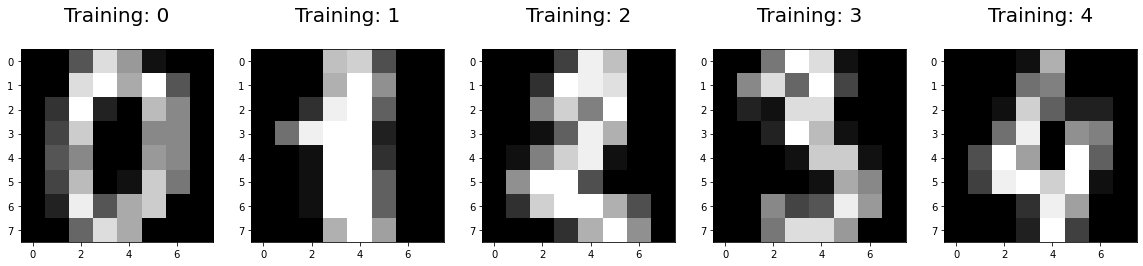

In [19]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap='gray')
    plt.title('Training: %i\n' %label, fontsize=20)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


In [22]:
from sklearn.linear_model import LogisticRegression

In [27]:
#Fit the model onto the test dataset
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# It return a NumPy Array
# Predict for One Observation (Image)

print(logisticReg.predict(X_test[0].reshape(1,-1)))

[4]


In [29]:
# Predict for 10 Observation (Image)
logisticReg.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [30]:
predictions = logisticReg.predict(X_test)

In [31]:
# Calculating Accuracy Score
score = logisticReg.score(X_test, y_test)
print(score)

0.9516908212560387


In [34]:
# Creating Confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

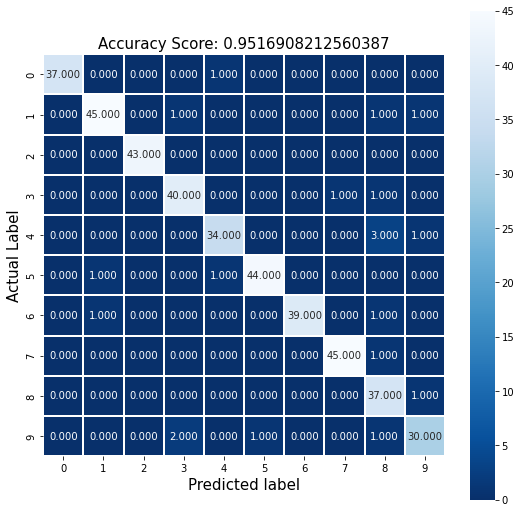

In [48]:
# HeatMap to represent the Confusion matrix graphically
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, fmt=".3f", lw=1.5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
Title = 'Accuracy Score: {0}'.format(score)
plt.title(Title, size=15)

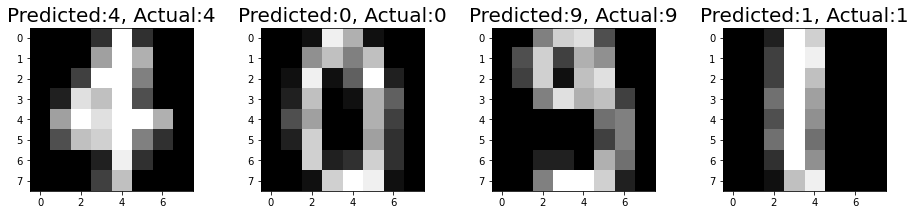

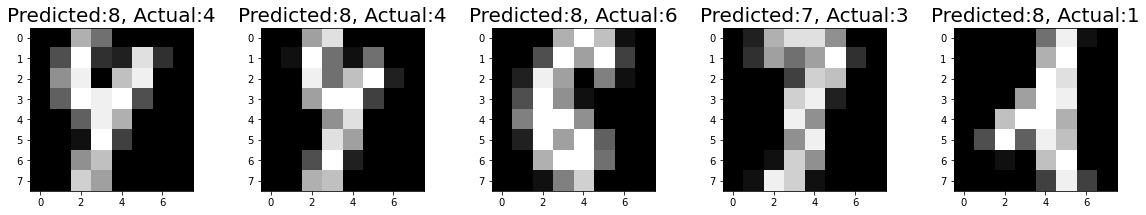

In [59]:
# Displaying the predicted and actual digits

index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1

plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap='gray')
    plt.title("Predicted:{}, Actual:{}". format(predictions[wrong], y_test[wrong]), fontsize=20)

